In [1]:
import matplotlib.pyplot as plt
import torch

In [3]:
sensitivity=torch.load("../cache/meta-llama_Llama-2-7b-hf_sensitivity_s1_abs_mean_0.5_32_wikitext2.pt")

/tmp/ipykernel_1335962/3545711348.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


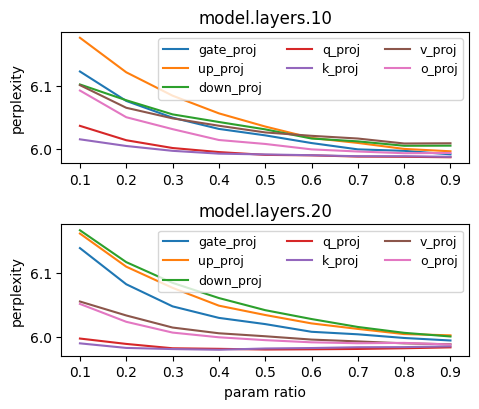

In [25]:
fig=plt.figure(figsize=(5,4))
for layeri, l in enumerate([10,20]):
    # layer_pre="model.decoder.layers."+str(l)
    layer_pre="model.layers."+str(l)
    ax=fig.add_subplot(2,1,layeri+1)
    
    # y tick format .1f
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    # ax.set_ylabel("perplexity")
    ax.set_ylabel("perplexity")
    ax.set_title(layer_pre)
    # tight layout to avoid overlap
    plt.tight_layout()

    for name, ss in sensitivity.items():
        if layer_pre in name:
            data=[]
            for ratio,ppl in ss.items():
                data.append((ratio,ppl))

            ax.plot([x[0] for x in data],[x[1] for x in data],label=name.split(".")[-1])
    # lengend two columns
    # ax.legend(ncol=3,loc='upper center',fontsize=9)
    ax.legend(ncol=3,fontsize=9)
ax.set_xlabel("param ratio")
plt.show()
# save pdf
import os
if not os.path.exists("../plots"):
    os.makedirs("../plots")
fig.savefig("../plots/sensitivity.pdf",bbox_inches='tight')
